In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn

In [2]:
ep = pd.read_excel('data/Augemented_Formatted_results.xls', sheet_name='Equity premium', skiprows= range(1118,1127,1))[:-1]
ep['Date'] = pd.to_datetime(ep['Date'], format='%Y%m')
ep = ep.set_index('Date')

In [3]:
ep

,Log equity premium,Simple equity premium
Date,,
1927-01-01,-0.005216,-0.005215
1927-02-01,0.042040,0.043051
1927-03-01,0.004573,0.004596
1927-04-01,0.010524,0.010607
1927-05-01,0.058445,0.060357
...,...,...
2019-08-01,-0.017964,-0.017835
2019-09-01,0.016993,0.017166
2019-10-01,0.019817,0.020046


In [4]:
rawData =  pd.read_excel('data/Returns_econ_tech_data_augmented.xls', sheet_name='Monthly')

In [5]:
spot = rawData[['Date', 'S&P 500 index']]
spot['Date'] = pd.to_datetime(spot['Date'], format='%Y%m')
spot = spot.set_index('Date')

/home/lex/anaconda3/envs/hft/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
spot

,S&P 500 index
Date,
1871-01-01,4.440000
1871-02-01,4.500000
1871-03-01,4.610000
1871-04-01,4.740000
1871-05-01,4.860000
...,...
2019-08-01,2926.459961
2019-09-01,2976.739990
2019-10-01,3037.560059


In [7]:
#Select data starting from 1950-12 to be in line with Rapach
spot = spot.loc[(spot.index >= '1950-12-01')]

Text(0.5, 1.0, 'S&P 500 Spot Index Level')

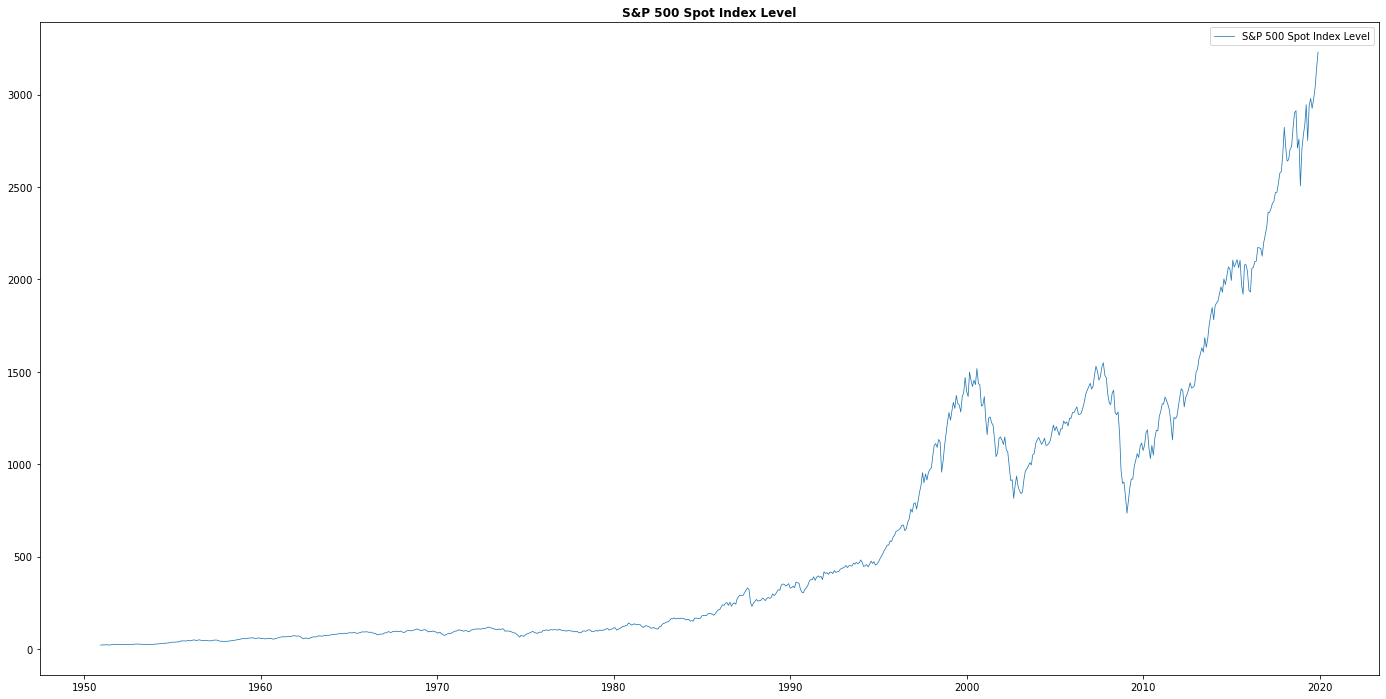

In [8]:
plt.figure(figsize=(24,12))
plt.plot(spot, label = 'S&P 500 Spot Index Level', linewidth = .75)
plt.legend()
plt.title('S&P 500 Spot Index Level', fontweight = 'bold')

Text(0.5, 1.0, 'S&P 500 Monthly Returns')

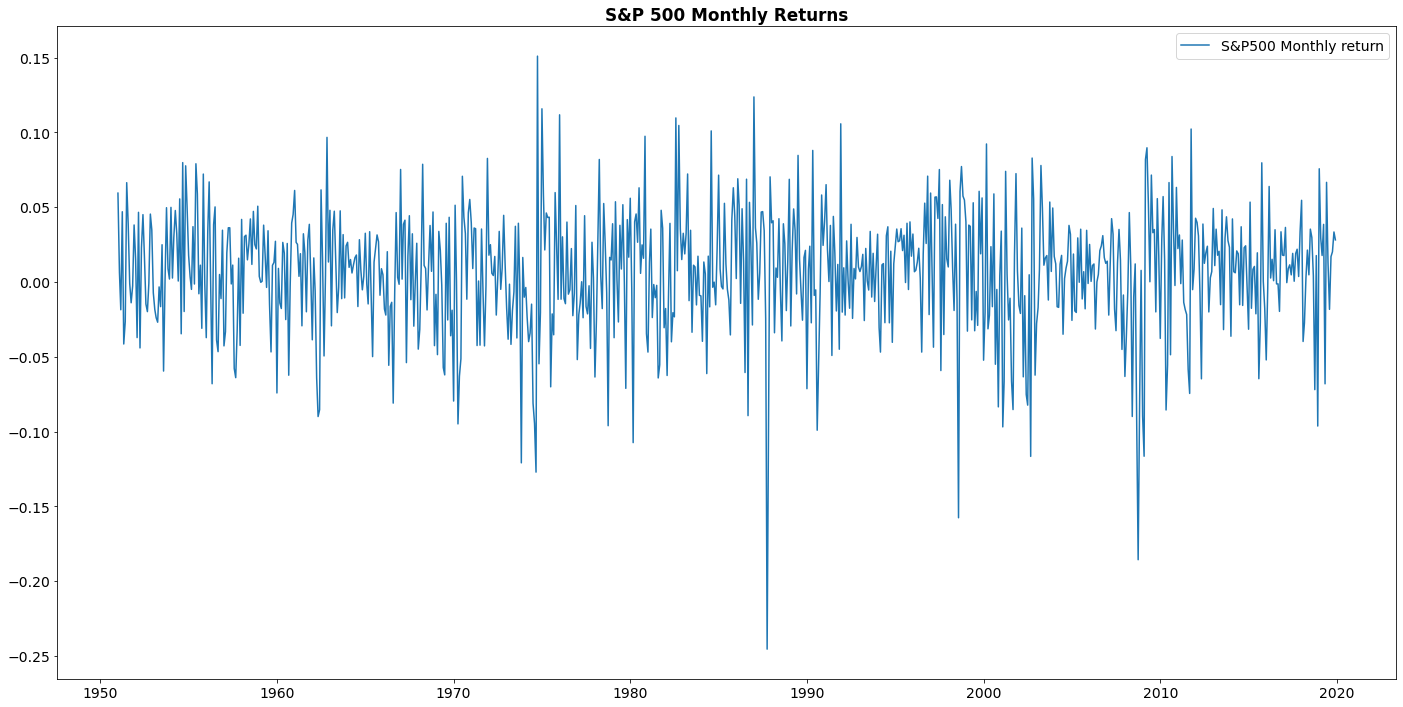

In [14]:
plt.figure(figsize=(24,12))
# plt.plot(ep['Simple equity premium'], label = 'S&P 500 Simple equity premium', linewidth = .75)
# plt.plot(ep['Log equity premium'], label = 'S&P 500 Log equity premium', linewidth = .75)
# plt.plot((spot['S&P 500 index']/spot['S&P 500 index'].shift(1))-1, label = 'S&P500 Monthly return')
plt.plot(np.log(spot['S&P 500 index'])-np.log(spot['S&P 500 index'].shift(1)), label = 'S&P500 Monthly return')
# plt.plot(spot['S&P 500 index'].diff(1))
plt.legend()
plt.title('S&P 500 Monthly Returns', fontweight = 'bold')

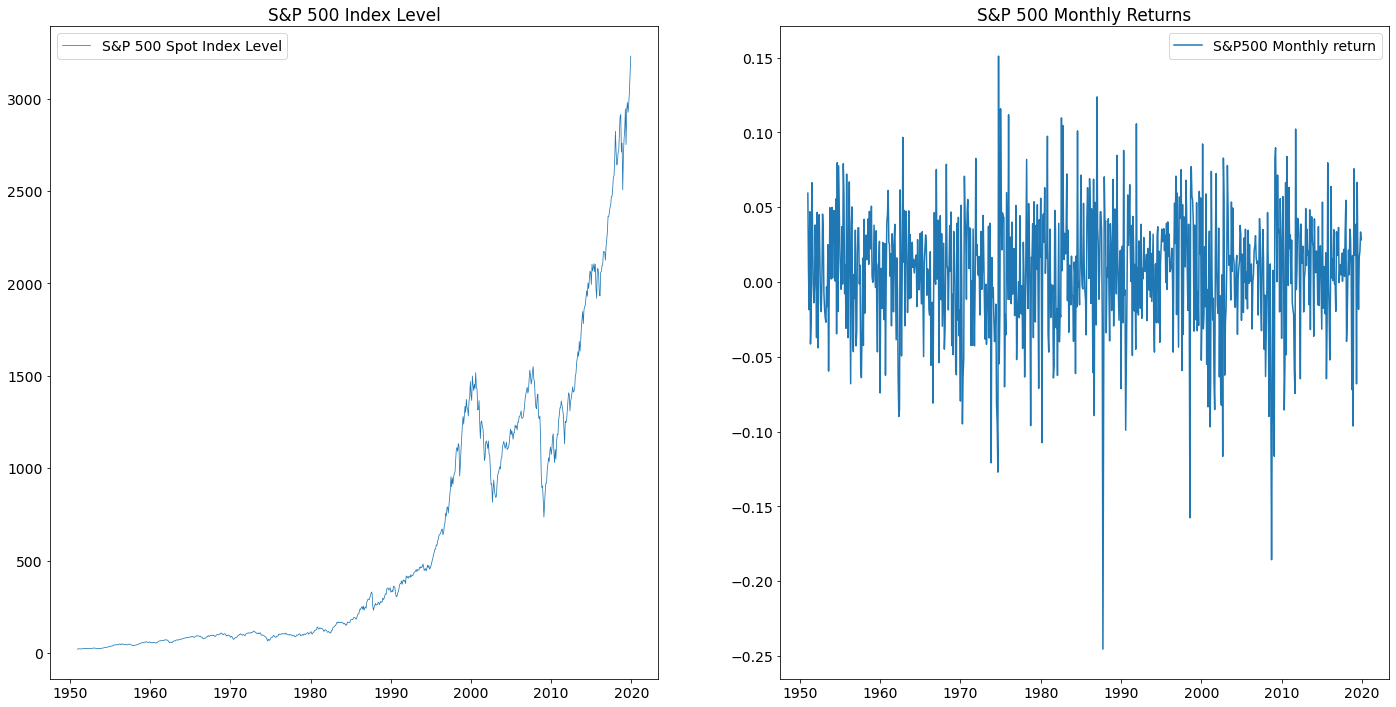

In [16]:
mpl.rcParams["font.size"] = 14
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,12))

ax[0].plot(spot, label = 'S&P 500 Spot Index Level', linewidth = .75)
ax[0].legend()
ax[0].title.set_text('S&P 500 Index Level')

ax[1].plot(np.log(spot['S&P 500 index'])-np.log(spot['S&P 500 index'].shift(1)), label = 'S&P500 Monthly return')
ax[1].legend()
ax[1].title.set_text('S&P 500 Monthly Returns')

plt.savefig("plots/SP500.png", bbox_inches='tight', dpi=500)